In [1]:
import pandas as pd
import numpy as np

from datetime import datetime
import pandas as pd 

from scipy import optimize
from scipy import integrate

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

import seaborn as sns


sns.set(style="darkgrid")

mpl.rcParams['figure.figsize'] = (16, 9)
pd.set_option('display.max_rows', 1000)




# Data set cleaned for Covid-19 modelling

the file COVED_small_flat_table has to be generated via the NOTEBOOK DATA PREPARATION

Goal of the exercise a dynamic dashboard of the last cell in the notebook, where one can select the fit for different countries

Fit of SIR model for Germany cases


In [2]:
# try to parse the dates right at the beginning 
# it works out of the box if the date was stored ISO YYYY-MM-DD format


df_analyse=pd.read_csv('../data/processed/COVID_small_flat_table.csv',sep=';')  
df_analyse.sort_values('date',ascending=True).tail()

,Unnamed: 0,date,US,India,Germany,Italy,Australia
875,875,2022-06-15,85941290,43257730,27096571,17736696,7724035
876,876,2022-06-16,86057735,43270577,27124689,17773764,7753800
877,877,2022-06-17,86216418,43283793,27204953,17809934,7778643
878,878,2022-06-18,86230982,43296692,27204955,17844905,7801241
879,879,2022-06-19,86246101,43309473,27211896,17879160,7825659


In [3]:
df_analyse = df_analyse.drop(columns=['Unnamed: 0'], axis=1)
df_analyse

,date,US,India,Germany,Italy,Australia
0,2020-01-22,1,0,0,0,0
1,2020-01-23,1,0,0,0,0
2,2020-01-24,2,0,0,0,0
3,2020-01-25,2,0,0,0,0
4,2020-01-26,5,0,0,0,4
5,2020-01-27,5,0,1,0,5
6,2020-01-28,5,0,4,0,5
7,2020-01-29,6,0,4,0,6
8,2020-01-30,6,1,4,0,9
9,2020-01-31,8,1,5,2,9


In [244]:
# set some basic parameters
# beta/gamma is denoted as  'basic reproduction number'

N0=100000000 #max susceptible population
beta=0.4   # infection spread dynamics
gamma=0.1  # recovery rate


# condition I0+S0+R0=N0
I0=df_analyse.Germany[35]
S0=N0-I0
R0=0

In [245]:
def SIR_model(SIR,beta,gamma):
    ''' Simple SIR model
        S: susceptible population
        I: infected people
        R: recovered people
        beta: 
        
        overall condition is that the sum of changes (differnces) sum up to 0
        dS+dI+dR=0
        S+I+R= N (constant size of population)
    
    '''
    
    S,I,R=SIR
    dS_dt=-beta*S*I/N0          #S*I is the 
    dI_dt=beta*S*I/N0-gamma*I
    dR_dt=gamma*I
    return([dS_dt,dI_dt,dR_dt])


# Simulative approach to calculate SIR curves

In [246]:

SIR=np.array([S0,I0,R0])
propagation_rates=pd.DataFrame(columns={'susceptible':S0,
                                        'infected':I0,
                                        'recoverd':R0})



for each_t in np.arange(100):
   
    new_delta_vec=SIR_model(SIR,beta,gamma)
   
    SIR=SIR+new_delta_vec
    
    propagation_rates=propagation_rates.append({'susceptible':SIR[0],
                                                'infected':SIR[1],
                                                'recovered':SIR[2]}, ignore_index=True)


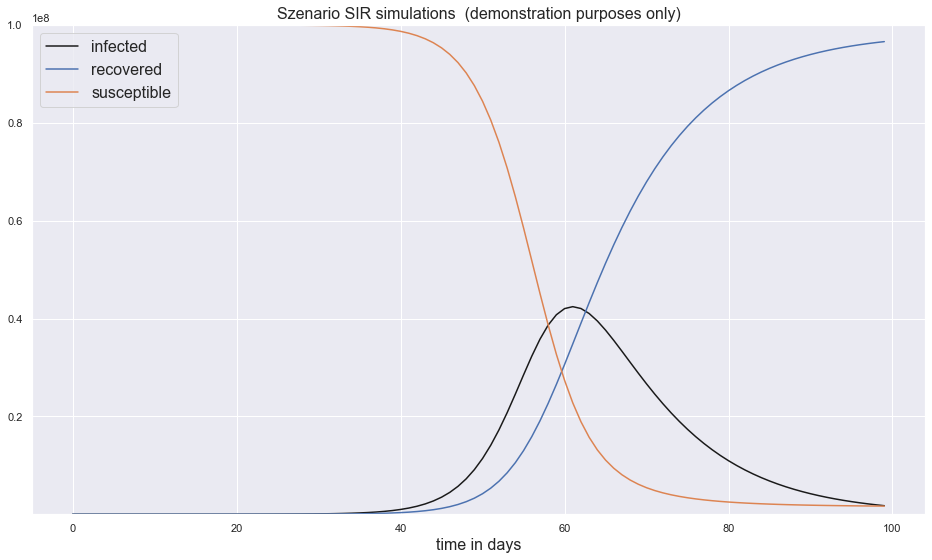

In [248]:
fig, ax1 = plt.subplots(1, 1)

ax1.plot(propagation_rates.index,propagation_rates.infected,label='infected',color='k')
ax1.plot(propagation_rates.index,propagation_rates.recovered,label='recovered')
ax1.plot(propagation_rates.index,propagation_rates.susceptible,label='susceptible')

ax1.set_ylim(10, 100000000)
ax1.set_yscale('linear')
ax1.set_title('Szenario SIR simulations  (demonstration purposes only)',size=16)
ax1.set_xlabel('time in days',size=16)
ax1.legend(loc='best',
           prop={'size': 16});

# Fitting the parameters of SIR model

In [249]:
ydata = np.array(df_analyse.US[50:])
t=np.arange(len(ydata))

In [250]:
df_analyse.US

0             1
1             1
2             2
3             2
4             5
5             5
6             5
7             6
8             6
9             8
10            8
11            8
12           11
13           11
14           11
15           12
16           12
17           12
18           12
19           12
20           13
21           13
22           14
23           14
24           14
25           14
26           14
27           14
28           14
29           14
30           16
31           16
32           16
33           16
34           16
35           16
36           17
37           17
38           25
39           32
40           55
41           74
42          107
43          184
44          237
45          403
46          519
47          594
48          782
49         1147
50         1586
51         2219
52         2978
53         3212
54         4679
55         6512
56         9169
57        13663
58        20030
59        26025
60        34944
61        46096
62      

In [251]:
# ensure re-initialization 
I0=ydata[0]
S0=N0-I0
R0=0
beta

0.4

In [252]:
def SIR_model_t(SIR,t,beta,gamma):
    ''' Simple SIR model
        S: susceptible population
        t: time step, mandatory for integral.odeint
        I: infected people
        R: recovered people
        beta: 
        
        overall condition is that the sum of changes (differnces) sum up to 0
        dS+dI+dR=0
        S+I+R= N (constant size of population)
    
    '''
    
    S,I,R=SIR
    dS_dt=-beta*S*I/N0          #S*I is the 
    dI_dt=beta*S*I/N0-gamma*I
    dR_dt=gamma*I
    return dS_dt,dI_dt,dR_dt

In [253]:
def fit_odeint(x, beta, gamma):
    '''
    helper function for the integration
    '''
    return integrate.odeint(SIR_model_t, (S0, I0, R0), t, args=(beta, gamma))[:,1] # we only would like to get dI

In [254]:
# example curve of our differential equationa
popt=[0.4,0.1]
fit_odeint(t, *popt)

array([ 1.58600000e+03,  2.14085948e+03,  2.88982567e+03,  3.90079477e+03,
        5.26540559e+03,  7.10733637e+03,  9.59349681e+03,  1.29491209e+04,
        1.74781142e+04,  2.35904718e+04,  3.18392017e+04,  4.29700078e+04,
        5.79880667e+04,  7.82476426e+04,  1.05572103e+05,  1.42414196e+05,
        1.92069270e+05,  2.58957435e+05,  3.48994227e+05,  4.70072633e+05,
        6.32680962e+05,  8.50678700e+05,  1.14224142e+06,  1.53095843e+06,
        2.04701078e+06,  2.72825518e+06,  3.62087140e+06,  4.77898274e+06,
        6.26235128e+06,  8.13097718e+06,  1.04354356e+07,  1.32024697e+07,
        1.64171616e+07,  2.00059257e+07,  2.38275061e+07,  2.76796585e+07,
        3.13249256e+07,  3.45304441e+07,  3.71089490e+07,  3.89468990e+07,
        4.00121441e+07,  4.03429568e+07,  4.00264737e+07,  3.91753369e+07,
        3.79083972e+07,  3.63376816e+07,  3.45612756e+07,  3.26606331e+07,
        3.07006861e+07,  2.87314494e+07,  2.67902381e+07,  2.49039722e+07,
        2.30912999e+07,  

In [255]:
# the resulting curve has to be fitted
# free parameters are here beta and gamma

In [256]:
popt, pcov = optimize.curve_fit(fit_odeint, t, ydata)
perr = np.sqrt(np.diag(pcov))
    
print('standard deviation errors : ',str(perr), ' start infect:',ydata[0])
print("Optimal parameters: beta =", popt[0], " and gamma = ", popt[1])



C:\Users\Dheeraj\anaconda3\lib\site-packages\scipy\integrate\odepack.py:247: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)
C:\Users\Dheeraj\AppData\Local\Temp/ipykernel_11548/649699423.py:16: RuntimeWarning: overflow encountered in double_scalars
  dS_dt=-beta*S*I/N0          #S*I is the
C:\Users\Dheeraj\AppData\Local\Temp/ipykernel_11548/649699423.py:17: RuntimeWarning: overflow encountered in double_scalars
  dI_dt=beta*S*I/N0-gamma*I
C:\Users\Dheeraj\AppData\Local\Temp/ipykernel_11548/649699423.py:18: RuntimeWarning: overflow encountered in double_scalars
  dR_dt=gamma*I
C:\Users\Dheeraj\anaconda3\lib\site-packages\scipy\integrate\odepack.py:247: ODEintWarning: Illegal input detected (internal error). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)


standard deviation errors :  [1.44785618e-04 7.62675586e-05]  start infect: 1586
Optimal parameters: beta = 0.020611258356870416  and gamma =  0.0011780315702755119


In [257]:
# get the final fitted curve
fitted=fit_odeint(t, *popt)

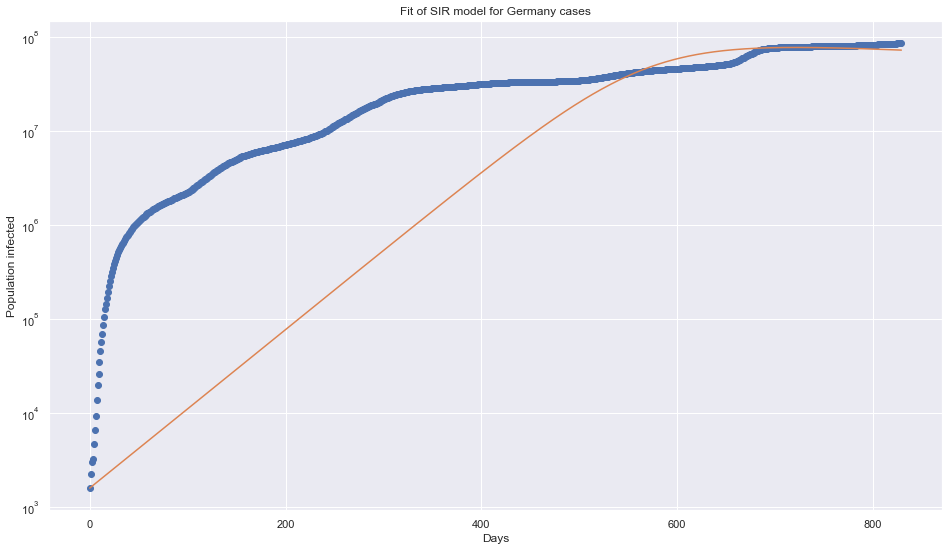

Optimal parameters: beta = 0.020611258356870416  and gamma =  0.0011780315702755119
Basic Reproduction Number R0  17.49635483202709
This ratio is derived as the expected number of new infections (these new infections are sometimes called secondary infections from a single infection in a population where all subjects are susceptible. @wiki


In [258]:
plt.semilogy(t, ydata, 'o')
plt.semilogy(t, fitted)
plt.title("Fit of SIR model for Germany cases")
plt.ylabel("Population infected")
plt.xlabel("Days")
plt.show()
print("Optimal parameters: beta =", popt[0], " and gamma = ", popt[1])
print("Basic Reproduction Number R0 " , popt[0]/ popt[1])
print("This ratio is derived as the expected number of new infections (these new infections are sometimes called secondary infections from a single infection in a population where all subjects are susceptible. @wiki")

In [270]:

temp_col = np.concatenate((np.zeros((50,), dtype=int), fitted), axis=None)
temp_col

array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 1.58600000e+03, 1.61712199e+03,
       1.64885467e+03, 1.68121003e+03, 1.71420029e+03, 1.74783790e+03,
      

In [271]:
df_analyse['Germany_SIR'] = np.array(temp_col)

In [273]:
df_analyse.tail()

,date,US,India,Germany,Italy,Australia,Germany_SIR
875,2022-06-15,85941290,43257730,27096571,17736696,7724035,7.323928e+07
876,2022-06-16,86057735,43270577,27124689,17773764,7753800,7.316994e+07
877,2022-06-17,86216418,43283793,27204953,17809934,7778643,7.310040e+07
878,2022-06-18,86230982,43296692,27204955,17844905,7801241,7.303069e+07
879,2022-06-19,86246101,43309473,27211896,17879160,7825659,7.296079e+07


In [276]:
df_analyse = df_analyse.drop(columns=['Germany_SIR'], axis=1)

## Create SIR values for all the countries in small flat table

In [85]:
ydata = np.array(df_analyse.Australia[35:])
t=np.arange(len(ydata))

In [86]:
N0=10000000 #max susceptible population (100 million)
beta=0.4   # infection spread dynamics
gamma=0.1  # recovery rate

I0=ydata[0]
S0=N0-I0
R0=0

In [87]:
def SIR_model_t(SIR,t,beta,gamma):
    ''' Simple SIR model
        S: susceptible population
        t: time step, mandatory for integral.odeint
        I: infected people
        R: recovered people
        beta: 

        overall condition is that the sum of changes (differnces) sum up to 0
        dS+dI+dR=0
        S+I+R= N (constant size of population)

    '''

    S,I,R=SIR
    dS_dt=-beta*S*I/N0         
    dI_dt=beta*S*I/N0-gamma*I
    dR_dt=gamma*I
    return dS_dt,dI_dt,dR_dt

In [88]:
def fit_odeint(x, beta, gamma):
    '''
    helper function for the integration
    '''
    return integrate.odeint(SIR_model_t, (S0, I0, R0), t, args=(beta, gamma))[:,1] # we only would like to get dI


In [89]:
popt, pcov = optimize.curve_fit(fit_odeint, t, ydata)
# get the final fitted curve
fitted=fit_odeint(t, *popt)

C:\Users\Dheeraj\AppData\Local\Temp/ipykernel_10548/2167991639.py:16: RuntimeWarning: overflow encountered in double_scalars
  dS_dt=-beta*S*I/N0
C:\Users\Dheeraj\AppData\Local\Temp/ipykernel_10548/2167991639.py:17: RuntimeWarning: overflow encountered in double_scalars
  dI_dt=beta*S*I/N0-gamma*I
C:\Users\Dheeraj\AppData\Local\Temp/ipykernel_10548/2167991639.py:18: RuntimeWarning: overflow encountered in double_scalars
  dR_dt=gamma*I


RuntimeError: Optimal parameters not found: Number of calls to function has reached maxfev = 600.

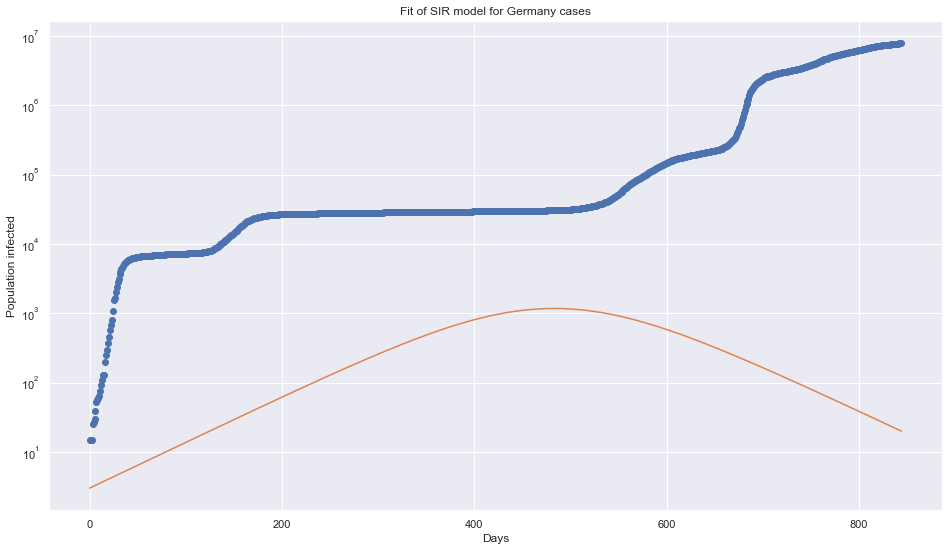

Optimal parameters: beta = 0.998742950443267  and gamma =  0.9835268181360258
Basic Reproduction Number R0  1.0154709887180084
This ratio is derived as the expected number of new infections (these new infections are sometimes called secondary infections from a single infecti


In [90]:
plt.semilogy(t, ydata, 'o')
plt.semilogy(t, fitted)
plt.title("Fit of SIR model for Germany cases")
plt.ylabel("Population infected")
plt.xlabel("Days")
plt.show()
print("Optimal parameters: beta =", popt[0], " and gamma = ", popt[1])
print("Basic Reproduction Number R0 " , popt[0]/ popt[1])
print("This ratio is derived as the expected number of new infections (these new infections are sometimes called secondary infections from a single infecti")

In [35]:
for each_country in countries_list:
    #print(each_country)
    ''' N0=1000000000 #max susceptible population (100 crores = 1 billion)
    beta=0.4   # infection spread dynamics
    gamma=0.1  # recovery rate'''



    ydata = np.array(df_analyse[each_country][initial_margin_days:])
    t=np.arange(len(ydata))

    # condition I0+S0+R0=N0
    '''I0=ydata[0]
    S0=N0-I0
    R0=0'''

    popt, pcov = optimize.curve_fit(fit_odeint, t, ydata, p0=[0.4,0.1], maxfev=5000)
    
    

    # get the final fitted curve
    fitted=fit_odeint(t, *popt)

    temp_column = np.concatenate((np.zeros((initial_margin_days,), dtype=int), fitted), axis=None)
    df_analyse[each_country+'_SIR'] = np.array(temp_column)
    
    

RuntimeError: Optimal parameters not found: Number of calls to function has reached maxfev = 5000.

In [ ]:
import pandas as pd
import numpy as np

import dash
dash.__version__
import dash_core_components as dcc
import dash_html_components as html
from dash.dependencies import Input, Output,State

import plotly.graph_objects as go

import os
print(os.getcwd())
df_input_large=pd.read_csv('data/processed/COVID_final_set.csv',sep=';')


fig = go.Figure()

app = dash.Dash()
app.layout = html.Div([

    dcc.Markdown('''
    #  Applied Data Science on COVID-19 data

    Goal of the project is to teach data science by applying a cross industry standard process,
    it covers the full walkthrough of: automated data gathering, data transformations,
    filtering and machine learning to approximating the doubling time, and
    (static) deployment of responsive dashboard.

    '''),

    dcc.Markdown('''
    ## Multi-Select Country for visualization
    '''),


    dcc.Dropdown(
        id='country_drop_down',
        options=[ {'label': each,'value':each} for each in df_input_large['country'].unique()],
        value=['US', 'Germany','Italy'], # which are pre-selected
        multi=True
    ),

    dcc.Markdown('''
        ## Select Timeline of confirmed COVID-19 cases or the approximated doubling time
        '''),


    dcc.Dropdown(
    id='doubling_time',
    options=[
        {'label': 'Timeline Confirmed ', 'value': 'confirmed'},
        {'label': 'Timeline Confirmed Filtered', 'value': 'confirmed_filtered'},
        {'label': 'Timeline Doubling Rate', 'value': 'confirmed_DR'},
        {'label': 'Timeline Doubling Rate Filtered', 'value': 'confirmed_filtered_DR'},
    ],
    value='confirmed',
    multi=False
    ),

    dcc.Graph(figure=fig, id='main_window_slope')
])



@app.callback(
    Output('main_window_slope', 'figure'),
    [Input('country_drop_down', 'value'),
    Input('doubling_time', 'value')])
def update_figure(country_list,show_doubling):


    if '_DR' in show_doubling:
        my_yaxis={'type':"log",
               'title':'Approximated doubling rate over 3 days'
              }
    else:
        my_yaxis={'type':"log",
                  'title':'Confirmed infected people (source johns hopkins csse, log-scale)'
              }


    traces = []
    for each in country_list:

        df_plot=df_input_large[df_input_large['country']==each]

        if '_DR' in show_doubling:
            df_plot=df_plot[['state','country','confirmed','confirmed_filtered','confirmed_DR','confirmed_filtered_DR','date']].groupby(['country','date']).agg(np.mean).reset_index()
        else:
            df_plot=df_plot[['state','country','confirmed','confirmed_filtered','confirmed_DR','confirmed_filtered_DR','date']].groupby(['country','date']).agg(np.sum).reset_index()



        traces.append(dict(x=df_plot.date,
                                y=df_plot[show_doubling],
                                mode='markers+lines',
                                opacity=0.9,
                                name=each
                        )
                )

    return {
            'data': traces,
            'layout': dict (
                width=1280,
                height=720,

                xaxis={'title':'Timeline',
                        'tickangle':-45,
                        'nticks':20,
                        'tickfont':dict(size=14,color="#7f7f7f"),
                      },

                yaxis=my_yaxis
        )
    }

if __name__ == '__main__':

    app.run_server(debug=True, use_reloader=False)